# Analisis Paket Prabayar Telekomunikasi Megaline

Sebagai analis di Megaline, saya bertugas untuk menganalisis performa paket prabayar Surf dan Ultimate guna menentukan paket mana yang menghasilkan pendapatan lebih tinggi. Dengan mengevaluasi data penjualan dan penggunaan pelanggan, saya akan memberikan informasi yang akurat kepada departemen periklanan agar mereka dapat mengoptimalkan anggaran iklan dan meraih hasil yang maksimal.

# Daftar Isi

* [Tujuan](#)
* [Deskripsi Paket Prabayar](#)
* [Hipotesis](#)
* [Tahapan](#)
* [1. Pra-pemrosesan Data](#)
    * [1.1. Memuat Data](#)
    * [1.2. Mengeksploarasi Data Awal](#)
    * [1.3. Mengatasi Nilai-Niali yang Hilang](#)
    * [1.4. Memperbaiki Tipe Data](#)
    * [1.5. Memperbaiki Kualitas Data](#)
    * [1.6. Menghitung Jumlah Profit](#)
* [2. Analisis Data Eksploratif (EDA)](#)
    * [2.1. Memeriksa Data yang Sudah Bersih](#)
    * [2.2. Mempelajari Parameter Inti](#)
    * [2.3. Mempelajari dan Menangani Outlier](#)
* [3. Analisis Data Statistik (Hypothesis Testing](#)
    * [3.1. Menguji Hipotesis](#)
* [Kesimpulan](#)
    * [A. Pra-pemrosesan Data](#)
    * [B. Analisis Data Eksploratif (EDA)](#)
    * [C. Analisis Data Statistik (Hypothesis Testing](#)

## Tujuan

Proyek ini bertujuan untuk melakukan analisis awal terhadap paket-paket prabayar Surf dan Ultimate berdasarkan sampel klien Megaline pada tahun 2018. Meskipun ukuran sampel klien relatif kecil, dengan menggunakan data perilaku klien, kami akan menentukan paket prabayar yang menghasilkan pendapatan lebih tinggi. Analisis ini akan memberikan wawasan awal kepada perusahaan untuk memahami preferensi pelanggan dan mengarahkan strategi pemasaran ke depan dengan lebih efektif.

### Deskripsi Paket Prabayar

Sebagai catatan, Megaline menerapkan pembulatan waktu panggilan ke menit dan pembulatan ukuran lalu lintas web ke gigabita. Dalam hal panggilan, setiap panggilan individual akan dibulatkan ke atas, bahkan jika panggilan tersebut berlangsung hanya satu detik, sehingga dihitung sebagai satu menit. Sedangkan untuk lalu lintas web, setiap sesi web tidak dibulatkan ke atas secara individu, namun total lalu lintas web dalam sebulan akan dibulatkan ke atas. Sebagai contoh, jika seorang pengguna menghabiskan 1025 megabita dalam satu bulan, maka pengguna tersebut akan dikenai biaya untuk 2 gigabita.

**Surf**

    1. Biaya Bulanan: 20 dolar
    2. 500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
    3. Setelah melebihi batas paket, akan dikenakan:
        a. 1 Menit: 3 Sen
        b. 1 SMS: 3 Sen
        c. 1 Gb data: 10 dolar
        
**Ultimate**

    1. Biaya bulanan: 70 dolar
    2. 3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
    3. Setelah melebihi batas paket, akan dikenakan:
        a. 1 menit: 1 sen
        b. 1 SMS: 1 sen
        c. 1 GB data: 7 dolar

### Hipotesis

    1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf memiliki perbedaan yang signifikan.
    2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda secara signifikan dengan pendapatan pengguna dari wilayah lain.
    
### Tahapan

Data tentang paket-paket prabayar Megaline disimpan dalam file:

    - /datasets/megaline_calls.csv
    - /datasets/megaline_internet.csv
    - /datasets/megaline_messages.csv
    - /datasets/megaline_plans.csv
    - /datasets/megaline_users.csv.
    
Tidak ada informasi terkait kualitas data tersebut, sehingga perlu dilakukan pemeriksaan terlebih dahulu sebelum menguji hipotesis.

Proyek ini terdiri dari 3 tahap:
    
    1. Pra-pemrosesan Data
    2. Analisis Data Exploratif (EDA)
    3. Analisis Data Statistik (Hypothesis Testing)

## 1. Pra-pemrosesan Data

#### Import library yang dibutuhkan:

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### 1.1. Memuat Data

In [2]:
# Try and except datasets
try:
    data_calls = pd.read_csv('megaline_calls.csv')
    data_internet = pd.read_csv('megaline_internet.csv')
    data_messages = pd.read_csv('megaline_messages.csv')
    data_plans = pd.read_csv('megaline_plans.csv')
    data_users = pd.read_csv('megaline_users.csv')
except:
    data_calls = pd.read_csv('/datasets/megaline_calls.csv')
    data_internet = pd.read_csv('/datasets/megaline_internet.csv')
    data_messages = pd.read_csv('/datasets/megaline_messages.csv')
    data_plans = pd.read_csv('/datasets/megaline_plans.csv')
    data_users = pd.read_csv('/datasets/megaline_users.csv')

### 1.2. Mengeksplorasi Data Awal

#### Data Pengguna (Data Users)

In [3]:
data_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


#### Deskripsi data_users:

 * `user_id` — ID pengguna
 * `first_name` — nama depan pengguna
 * `last_name` — nama belakang pengguna
 * `age` — usia pengguna (tahun)
 * `city` — kota tempat tinggal pengguna
 * `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
 * `plan` — nama paket telepon
 * `churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti  paket layanan sedang digunakan saat data ini dibuat)

In [4]:
# Check data info
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
# Check unique data from 'churn_date'
print(data_users['churn_date'].unique())

[nan '2018-12-18' '2018-11-16' '2018-09-07' '2018-12-30' '2018-10-07'
 '2018-12-31' '2018-11-24' '2018-11-11' '2018-12-12' '2018-11-14'
 '2018-12-27' '2018-11-29' '2018-12-22' '2018-11-30' '2018-10-13'
 '2018-07-31' '2018-12-15' '2018-12-19' '2018-10-03' '2018-10-22'
 '2018-08-16' '2018-12-26' '2018-09-01' '2018-11-21' '2018-08-19'
 '2018-12-10' '2018-09-17' '2018-11-18' '2018-09-18']


In [6]:
# Check duplicated data
data_users.duplicated().sum()

0

In [7]:
data_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

#### Kesimpulan sementara:

 * Dalam file data, kolom `reg_date` direpresentasikan sebagai tipe objek (object) bukan tipe tanggal (datetime).
 * Kolom `churn_date` memiliki beberapa nilai yang hilang, yang menunjukkan bahwa pengguna-pengguna tersebut masih aktif berlangganan.
 * Data pada tabel `data_users` tidak mengandung duplikat, artinya setiap entri pada tabel tersebut unik.

#### Data Panggilan (Data Calls)

In [8]:
data_calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Deskripsi data_calls:

 * Kolom `id` merupakan identifier unik yang digunakan untuk mengidentifikasi sesi telepon secara individu.
 * 
Kolom `user_id` adalah identifier yang digunakan untuk mengidentifikasi pengguna yang melakukan panggilan pada sesi telepon.
 * Kolom `call_date` berisi tanggal ketika panggilan dilakukan.
 * Kolom `duration` merepresentasikan durasi panggilan dalam satuan menit.

In [9]:
# Check data info
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Check statistics data
data_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [11]:
# Check duplicated data
data_calls.duplicated().sum()

0

In [12]:
data_calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

**Kesimpulan sementara:**

 * Dataset `data_calls` telah dibersihkan dan tidak mengandung nilai yang hilang serta tidak memiliki duplikat.
 * Kolom `duration` mengandung nilai yang tidak wajar, yaitu durasi panggilan sebesar 0.0 menit.

#### Data SMS (Data Massages)

In [13]:
data_messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


**Deskripsi data_messages:**

 * Kolom `id` merupakan identifier unik yang digunakan untuk mengidentifikasi pesan SMS secara individu.
 * Kolom `user_id` adalah identifier yang digunakan untuk mengidentifikasi pengguna yang mengirim SMS.
 * Kolom `message_date` berisi tanggal ketika SMS dikirim.

In [14]:
# Check data info
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Check duplicated data
data_messages.duplicated().sum()

0

In [16]:
data_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

**Kesimpulan sementara:**

 * Dataset `data_messages` telah dibersihkan dan tidak mengandung nilai yang hilang serta tidak memiliki duplikat.

#### Data Sesi Web (Data Internet)

In [17]:
data_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


**Deskripsi data_internet:**

 * Kolom `id` merupakan identifier unik yang digunakan untuk mengidentifikasi sesi web secara individu.
 * Kolom `user_id` adalah identifier yang digunakan untuk mengidentifikasi pengguna pada sesi web.
 * Kolom `session_date` berisi tanggal ketika sesi web dilakukan.
 * Kolom `mb_used` adalah kolom yang merepresentasikan volume data yang dihabiskan selama sesi web dalam satuan megabita.

In [18]:
# Check data info
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Check statistics data
data_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [20]:
# Check duplicated data
data_internet.duplicated().sum()

0

In [21]:
data_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

**Kesimpulan sementara:**

 * Dataset `data_internet` telah dibersihkan dan tidak mengandung nilai yang hilang serta tidak memiliki duplikat.
 * Kolom `mb_used` mengandung nilai 0 MB yang dianggap sebagai anomali atau nilai yang tidak wajar.

#### Data Paket Telpon (Data Plans)

In [22]:
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Deskripsi data_plans:**

 * Kolom `messages_included` menyatakan alokasi SMS bulanan yang diberikan dalam paket.
 * Kolom `mb_per_month_included` menyatakan alokasi volume data bulanan yang diberikan dalam paket, dengan satuan megabita.
 * Kolom `minutes_included` menyatakan alokasi menit panggilan bulanan yang diberikan dalam paket.
 * Kolom `usd_monthly_fee` menyatakan biaya bulanan dalam mata uang dolar AS (USD).
 * Kolom `usd_per_gb` menyatakan harga per ekstra gigabita data jika pengguna telah melebihi batas alokasi paket. Perlu dicatat bahwa 1 gigabita (GB) setara dengan 1024 megabita (Mb).
 * Kolom `usd_per_message` menyatakan harga per SMS jika pengguna telah melebihi batas alokasi paket.
 * Kolom `usd_per_minute` menyatakan harga per menit jika pengguna telah melebihi batas alokasi paket. Misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya per menit.
 * Kolom `plan_name` menyatakan nama paket telepon yang digunakan.

In [23]:
# Check data info
data_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [24]:
# Check duplicated data
data_plans.duplicated().sum()

0

In [25]:
data_plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

**Kesimpulan sementara:**

 * Dataset `data_plans` telah dibersihkan dan tidak mengandung nilai yang hilang serta tidak memiliki duplikat.

### Kesimpulan dan Langkah-Langkah Selanjutnya

#### **Nilai yang Hilang**
Data yang tersedia dalam tabel meliputi informasi harga pengguna yang menggunakan layanan, dengan beberapa kolom mengandung data pengguna seperti ID pengguna, nama pengguna, usia, dan kota. Kolom lainnya menyimpan informasi terkait produk Megaline, seperti tanggal registrasi, nama paket telepon, dan tanggal berhenti berlangganan (jika ada). Terdapat juga data terkait panggilan, pesan, dan sesi web yang terkait dengan pengguna dan paket telepon yang digunakan, dengan setiap dataset memiliki ID unik. Selain itu, terdapat informasi lengkap tentang paket telepon secara keseluruhan.

Meskipun ada nilai yang hilang dalam data, namun hal tersebut tidak mempengaruhi tujuan proyek ini dan dapat diisi dengan penanda yang jelas. Alasan nilai-nilai tersebut hilang adalah karena pengguna masih berlangganan pada produk Megaline.

#### **Gaya Penulisan**
Setelah menangani nilai-nilai yang hilang, langkah selanjutnya adalah melakukan penataan data.
 * Untuk merapihkan data, perlu dilakukan konversi format object pada kolom `reg_date`, `call_date`, `message_date`, dan `session_date` menjadi format datetime64.
 
#### **Duplikat**
Selanjutnya, kita akan memeriksa adanya duplikat pada data. Namun, pada dataset ini tidak ditemukan adanya data duplikat, sehingga tidak perlu dilakukan analisis duplikat pada tahap awal.

#### **Anomali Data**
Setelah melakukan pemeriksaan terhadap data duplikat, perlu mempertimbangkan adanya data anomali yang dapat mempengaruhi analisis penelitian.
 * Pada kolom `duration` dalam dataset data_calls terdapat panggilan dengan durasi 0 menit, yang kemungkinan disebabkan oleh panggilan tak terjawab atau kesalahan sambung.
 * Pada kolom `mb_used` dalam dataset data_internet terdapat nilai volume yang tidak digunakan, yaitu 0 MB. Perlu dilakukan analisis lebih lanjut untuk memahami penyebab dan implikasi dari nilai tersebut.
 
Perlu diingat bahwa Megaline melakukan pembulatan detik ke menit dan megabita ke gigabita. Untuk panggilan, setiap panggilan individu akan dibulatkan ke atas, bahkan jika panggilan tersebut hanya berlangsung satu detik. Hal ini akan dihitung sebagai satu menit. Sedangkan untuk lalu lintas web, setiap sesi web individu tidak akan dibulatkan ke atas. Namun, total volume data untuk sebulan akan dibulatkan ke atas. Sebagai contoh, jika seorang pengguna menghabiskan 1025 megabita dalam sebulan ini, maka pengguna tersebut akan dikenai biaya untuk 2 gigabita.

### 1.3. Mengatasi Nilai-Nilai yang Hilang

In [26]:
# Check total missing values descending
data_users.isna().sum().sort_values(ascending=False)

churn_date    466
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
dtype: int64

Karena nilai yang hilang tidak memiliki dampak pada analisis, maka akan diberikan penanda yang jelas pada nilai-nilai tersebut.

In [27]:
data_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [28]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], errors='coerce')

In [29]:
# Check total missing values descending
data_users.isna().sum().sort_values(ascending=False)

churn_date    466
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
dtype: int64

### 1.4. Memperbaiki Tipe Data

In [30]:
# Change data format to datetime64
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

### 1.5. Memperbaiki Kualitas Data

In [31]:
# Add month column for data_calls
data_calls['month'] = data_calls['call_date'].dt.month_name()

In [32]:
# Rounding up duration and change it to integers
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)

In [33]:
# Add month column for data_messages
data_messages['month'] = data_messages['message_date'].dt.month_name()

In [34]:
# Add month column for data_internet
data_internet['month'] = data_internet['session_date'].dt.month_name()

In [35]:
# Create Pivot Table for count and sum total calls by months.
total_calls = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count','sum'])
total_calls.columns = ['call_count', 'total_duration']
total_calls.reset_index()

,user_id,month,call_count,total_duration
0,1000,December,16,124
1,1001,August,27,182
2,1001,December,56,412
3,1001,November,64,426
4,1001,October,65,393
...,...,...,...,...
2253,1498,September,45,363
2254,1499,December,65,496
2255,1499,November,45,308
2256,1499,October,53,385


In [36]:
# Create Pivot Table for count total messages by months.
total_messages = data_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc=['count'])
total_messages.columns = ['total_sms']
total_messages.reset_index()

,user_id,month,total_sms
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


In [37]:
# Create Pivot Table for count total session by months.
total_session = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
total_session.columns = ['total_mb']
total_session.reset_index()

,user_id,month,total_mb
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


In [38]:
# Add Gigabytes column:
# Divides the values by 1024 to convert and rounding up gb_used and change it to integers
total_session['gb_used'] = (total_session['total_mb']/1024).apply(np.ceil).astype(int)
total_session.reset_index()

,user_id,month,total_mb,gb_used
0,1000,December,1901.47,2
1,1001,August,6919.15,7
2,1001,December,19369.18,19
3,1001,November,18504.30,19
4,1001,October,22330.49,22
...,...,...,...,...
2272,1498,September,22827.28,23
2273,1499,December,22059.21,22
2274,1499,November,16813.83,17
2275,1499,October,19492.43,20


**Menggabungkan seluruh data**

In [39]:
# Menggabungkan dataset utama menjadi satu
data1 = total_calls.merge(total_session,on=['user_id','month'], how='outer')
data2 = data1.merge(total_messages, on=['user_id', 'month'], how='outer')
data2 = data2.reset_index()
data3 = data2.merge(data_users)
data_plan = data_users[['user_id', 'plan']]
data4 = data3.merge(data_plan, on='user_id',how='outer')
data = data4.merge(data_users).reset_index()

In [40]:
data.head()

,index,user_id,month,call_count,total_duration,total_mb,gb_used,total_sms,first_name,last_name,age,city,reg_date,plan_x,churn_date,plan_y,plan
0,0,1000,December,16.0,124.0,1901.47,2.0,11.0,Anamaria,Bauer,45.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,ultimate,ultimate
1,1,1001,August,27.0,182.0,6919.15,7.0,30.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,surf,surf
2,2,1001,December,56.0,412.0,19369.18,19.0,44.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,surf,surf
3,3,1001,November,64.0,426.0,18504.30,19.0,36.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,surf,surf
4,4,1001,October,65.0,393.0,22330.49,22.0,53.0,Mickey,Wilkerson,28.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,surf,surf


In [41]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

churn_date        2135
total_sms          487
call_count          35
total_duration      35
total_mb            16
gb_used             16
index                0
city                 0
plan_y               0
plan_x               0
reg_date             0
first_name           0
age                  0
last_name            0
user_id              0
month                0
plan                 0
dtype: int64

**Kesimpulan Sementara:**

Terdapat nilai hilang baru pada kolom `total_sms`, `call_count`, `total_duration`, `total_mb`, dan `gb_used`. Kemungkinan besar nilai-nilai tersebut kosong karena pengguna tidak menggunakan layanan tersebut. Untuk mengatasi nilai hilang, akan diberikan tanda 0 pada nilai-nilai tersebut.

In [42]:
# Filling the missing values with fillna()
# List of columns to fill missing values
columns = ['total_sms', 'call_count', 'total_duration', 'total_mb', 'gb_used']

# Loop through each column
for col in columns:
    data[col].fillna(0, inplace=True)

In [43]:
# Check total missing values descending
data.isna().sum().sort_values(ascending=False)

churn_date        2135
index                0
last_name            0
plan_y               0
plan_x               0
reg_date             0
city                 0
age                  0
first_name           0
user_id              0
total_sms            0
gb_used              0
total_mb             0
total_duration       0
call_count           0
month                0
plan                 0
dtype: int64

### 1.6. Menghitung Jumlah Profit
**Menghitung paket pengguna dan biaya tambahan**

In [44]:
data_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [45]:
# Adding Gigabytes value
data_plans['gb_per_month_included'] = data_plans['mb_per_month_included']/1024
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [46]:
# Create data filter for counting total profit
data_profit = data[['user_id', 'city', 'month',	'total_duration', 'total_sms', 'gb_used', 'plan']]
data_profit_plan = data_profit.merge(data_plans, left_on='plan', right_on='plan_name')
data_profit_plan 

,user_id,city,month,total_duration,total_sms,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",December,124.0,11.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",December,59.0,139.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",November,10.0,15.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",December,634.0,26.0,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",November,446.0,37.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",October,0.0,88.0,31.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2289,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",September,0.0,76.0,37.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2290,1349,"Boston-Cambridge-Newton, MA-NH MSA",December,0.0,61.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2291,1349,"Boston-Cambridge-Newton, MA-NH MSA",November,0.0,72.0,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0


**Paket Telepon**
 * 
Paket Surf memiliki alokasi 500 menit panggilan per bulan. Jika pengguna melebihi batas paket tersebut, akan dikenakan biaya sebesar 0.03 USD per menit.
 * Paket Ultimate memiliki alokasi 3000 menit panggilan per bulan. Jika pengguna melebihi batas paket tersebut, akan dikenakan biaya sebesar 0.01 USD per menit.

**Paket SMS**
 * Paket Surf memiliki alokasi 50 SMS per bulan. Jika pengguna melebihi batas paket tersebut, akan dikenakan biaya sebesar 0.03 USD per SMS.
 * Paket Ultimate memiliki alokasi 1000 SMS per bulan. Jika pengguna melebihi batas paket tersebut, akan dikenakan biaya sebesar 0.01 USD per SMS.

**Paket Internet**
 * Paket Surf memiliki alokasi 15 GB per bulan. Jika pengguna melebihi batas paket tersebut, akan dikenakan biaya sebesar 10 USD untuk setiap 1 GB yang digunakan melebihi batas.
 * Paket Ultimate memiliki alokasi 30 GB per bulan. Jika pengguna melebihi batas paket tersebut, akan dikenakan biaya sebesar 7 USD untuk setiap 1 GB yang digunakan melebihi batas.

In [47]:
# Create a function for calculating total additional charged per user
def add_profit(row):
    call_charge = row['total_duration'] - row['minutes_included']
    sms_charge = row['total_sms'] - row['messages_included']
    internet_charge = row['gb_used'] - row['gb_per_month_included']
    profit_charged = 0
    
    if call_charge > 0:
        profit_charged += call_charge * row['usd_per_minute']
    if sms_charge > 0:
        profit_charged += sms_charge * row['usd_per_message']
    if internet_charge > 0:
        profit_charged += internet_charge * row['usd_per_gb']
    return profit_charged

In [48]:
# Apply to DataFrame 
data_profit_plan['add_charged'] = data_profit_plan.apply(lambda row: add_profit(row), axis=1)
data_profit_plan.tail()

,user_id,city,month,total_duration,total_sms,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,add_charged
2288,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",October,0.0,88.0,31.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,161.14
2289,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",September,0.0,76.0,37.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,220.78
2290,1349,"Boston-Cambridge-Newton, MA-NH MSA",December,0.0,61.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.33
2291,1349,"Boston-Cambridge-Newton, MA-NH MSA",November,0.0,72.0,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.66
2292,1349,"Boston-Cambridge-Newton, MA-NH MSA",October,0.0,76.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.78


In [49]:
# Calculate total profit
data_profit_plan['monthly_profit'] = (data_profit_plan['add_charged'] + data_profit_plan['usd_monthly_pay'])
data_profit_plan

,user_id,city,month,total_duration,total_sms,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,add_charged,monthly_profit
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",December,124.0,11.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",December,59.0,139.0,32.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,14.00,84.00
2,1006,"San Francisco-Oakland-Berkeley, CA MSA",November,10.0,15.0,3.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
3,1008,"Orlando-Kissimmee-Sanford, FL MSA",December,634.0,26.0,15.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
4,1008,"Orlando-Kissimmee-Sanford, FL MSA",November,446.0,37.0,24.0,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.00,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",October,0.0,88.0,31.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,161.14,181.14
2289,1194,"San Jose-Sunnyvale-Santa Clara, CA MSA",September,0.0,76.0,37.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,220.78,240.78
2290,1349,"Boston-Cambridge-Newton, MA-NH MSA",December,0.0,61.0,13.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,0.33,20.33
2291,1349,"Boston-Cambridge-Newton, MA-NH MSA",November,0.0,72.0,17.0,surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.66,40.66


## 2. Analisis Data Exploratif (EDA)
### 2.1. Memeriksa Data yang Sudah Bersih

In [50]:
data_profit_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   city                   2293 non-null   object 
 2   month                  2293 non-null   object 
 3   total_duration         2293 non-null   float64
 4   total_sms              2293 non-null   float64
 5   gb_used                2293 non-null   float64
 6   plan                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_pay        2293 non-null   int64  
 11  usd_per_gb             2293 non-null   int64  
 12  usd_per_message        2293 non-null   float64
 13  usd_per_minute         2293 non-null   float64
 14  plan_name              2293 non-null   object 
 15  gb_p

 ### 2.2. Mempelajari Parameter Inti

Untuk mendeskripsikan perilaku konsumen, perlu dilakukan perhitungan untuk menit, pesan, dan volume penggunaan data seluler yang dibutuhkan oleh pengguna setiap paket per bulan. Selanjutnya, dapat dihitung rata-rata, varians, dan standar deviasi dari data tersebut.

In [51]:
# Calculating some statistical data
data_clean = data_profit_plan[['user_id', 'city', 'month', 'total_duration', 'total_sms', 'gb_used', 'plan', 'monthly_profit']]
data_clean.describe()

,user_id,total_duration,total_sms,gb_used,monthly_profit
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,429.283471,33.166594,16.870475,64.351147
std,143.051927,236.320077,34.070085,7.796174,46.624945
min,1000.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,265.000000,3.000000,12.000000,23.480000
50%,1245.000000,425.000000,26.000000,17.000000,70.000000
75%,1368.000000,572.000000,51.000000,21.000000,70.000000
max,1499.000000,1510.000000,266.000000,70.000000,590.370000


In [59]:
# Aggregate data by mean and median
agg_data = data_clean.groupby(['plan'])[['total_duration', 'total_sms', 'gb_used', 'monthly_profit']].agg(['mean', 'std', 'var'])
agg_data

total_duration                            total_sms             \
                   mean         std           var       mean        std   
plan                                                                      
surf         428.749523  234.453150  54968.279461  31.159568  33.566717   
ultimate     430.450000  240.508762  57844.464812  37.551389  34.767179   

                         gb_used                     monthly_profit  \
                  var       mean       std       var           mean   
plan                                                                  
surf      1126.724522  16.670693  7.847522  61.58360      60.706408   
ultimate  1208.756744  17.306944  7.670108  58.83055      72.313889   

                                  
                std          var  
plan                              
surf      55.388042  3067.835152  
ultimate  11.395108   129.848486

**Kesimpulan sementara:**

 * Perilaku pengguna pada paket Surf dan paket Ultimate memiliki rata-rata yang tidak terlalu berbeda. Mereka memiliki kemiripan dalam hal total durasi panggilan, total jumlah SMS, dan total penggunaan Gigabyte data seluler.

Pada tahap selanjutnya, akan digunakan diagram data untuk menganalisis. Setiap batang atau bar pada diagram akan merepresentasikan sebuah nilai, di mana tinggi batang tersebut akan mencerminkan tingginya nilai tersebut. Dengan menggunakan diagram data, perbedaan antar nilai dapat terlihat dengan jelas.

In [53]:
# Create data filter for surf and ultimate user
surf_user = data_clean[data_clean['plan'] == 'surf']
ultimate_user = data_clean[data_clean['plan'] == 'ultimate']

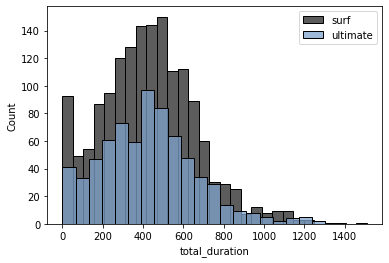

In [54]:
# Create histogram plot using seaborn for total duration
sns.histplot(surf_user['total_duration'], color='#262626', label='surf')
sns.histplot(ultimate_user['total_duration'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

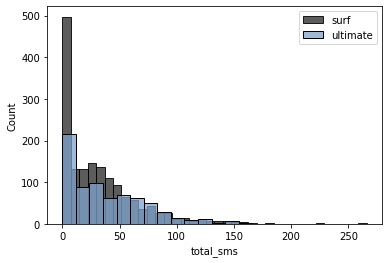

In [55]:
# Create histogram plot using seaborn for total sms
sns.histplot(surf_user['total_sms'], color='#262626', label='surf')
sns.histplot(ultimate_user['total_sms'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

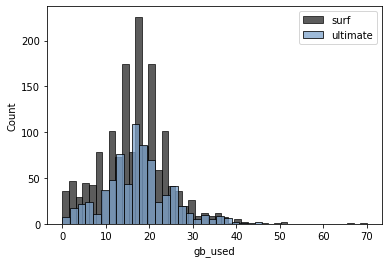

In [56]:
# Create histogram plot using seaborn for Gigabytes used
sns.histplot(surf_user['gb_used'], color='#262626', label='surf')
sns.histplot(ultimate_user['gb_used'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

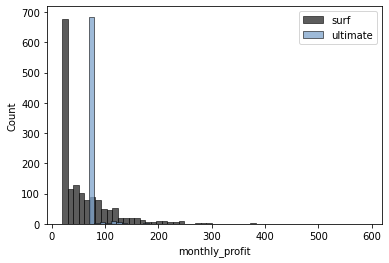

In [60]:
# Create histogram plot using seaborn for Gigabytes used
sns.histplot(surf_user['monthly_profit'], color='#262626', label='surf')
sns.histplot(ultimate_user['monthly_profit'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

**Kesimpulan sementara:**

 * Berdasarkan histogram, sebagian besar nilai mendekati nol. Hal ini menunjukkan bahwa sebagian besar pengguna tidak menggunakan layanan tersebut. Namun, terdapat outlier pada nilai median yang menunjukkan adanya pengguna yang membeli paket namun tidak menggunakannya. Kemungkinan mereka menggunakan aplikasi media sosial online pada paket telepon dan SMS, serta mungkin mengandalkan koneksi Wi-Fi sehingga tidak menggunakan kuota internet.
 * Nilai outlier pada kasus ini, yaitu nilai 0, perlu ditangani secara khusus.

### 2.3. Mempelajari dan Menangani Outlier
Untuk membuat DataFrame tanpa outlier, langkah selanjutnya adalah mengidentifikasi dan menentukan batas bawah/atas untuk rentang nilai normal. Dengan menggunakan batas tersebut, nilai-nilai yang di luar rentang tersebut dapat dianggap sebagai outlier dan dihapus dari DataFrame.

In [ ]:
# Function for removing outlier, determine upper and lower whisker
def upper_lower_whisker(column):
    Q1  = data_clean[column].quantile(0.25)
    Q3  = data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

In [ ]:
outlier_column = ['total_duration', 'total_sms', 'gb_used']

In [ ]:
# Loop for applying the function
for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    print('Batas bawah outlier dari',column, lower)
    print('Batas atas outlier dari',column, upper)
    print('')

In [ ]:
# Loop for cleaning the outlier
data_fixed = data_clean.copy()

for column in outlier_column:
    lower, upper = upper_lower_whisker(column)
    data_fixed = data_fixed[(data_fixed[column] > lower) & (data_fixed[column] < upper)]

Untuk membersihkan kolom-kolom dengan anomali, perlu diperiksa terlebih dahulu persentase kesalahannya. Dengan melihat persentase kesalahan, dapat ditentukan apakah penghapusan nilai-nilai tersebut akan signifikan atau tidak terhadap analisis yang dilakukan.

In [ ]:
# Loop for checking the percentage of wrong data
data_check = data_fixed[['total_duration', 'total_sms', 'gb_used']]
for col in data_check.columns:
    wrong_data = data_check[data_check[col] == 0]
    percentage_wrong_data = wrong_data[col].count() / data_check[col].count()
    print("Persentase data yang bernilai 0 pada kolom '{}' yaitu:{:.0%} dari keseluruhan data.".format(col, percentage_wrong_data))

Berdasarkan persentase kesalahan yang ditemukan, pada kolom `total_duration` dengan persentase kesalahan sebesar 2%, data dapat diiris untuk membersihkan anomali. Namun, pada kolom `total_sms` dengan persentase kesalahan yang cukup besar yaitu 22%, tidak akan dilakukan eliminasi data.

In [ ]:
# Slicing data
miss_call = 0

data_fixed = data_fixed.query('total_duration > @miss_call')

In [ ]:
# Check new dataset line after slicing
data_clean.shape[0]

In [ ]:
# Check new dataset line before slicing
data_fixed.shape[0]

**Kesimpulan sementara:**
 * Setelah menghilangkan outlier, jumlah data berkurang dari 2293 menjadi 2112.
 
Selanjutnya, akan dibuat grafik tanpa outlier untuk menganalisis data.

In [ ]:
# Create data filter for surf and ultimate user without outlier
surf_user_clean = data_fixed[data_fixed['plan'] == 'surf']
ultimate_user_clean = data_fixed[data_fixed['plan'] == 'ultimate']

In [ ]:
# Create histogram plot using seaborn for total duration
sns.histplot(surf_user_clean['total_duration'], color='#262626', label='surf')
sns.histplot(ultimate_user_clean['total_duration'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

In [ ]:
# Create histogram plot using seaborn for total sms
sns.histplot(surf_user_clean['total_sms'], color='#262626', label='surf')
sns.histplot(ultimate_user_clean['total_sms'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

In [ ]:
# Create histogram plot using seaborn for Gigabytes used
sns.histplot(surf_user_clean['gb_used'], color='#262626', label='surf')
sns.histplot(ultimate_user_clean['gb_used'], color='#7EA3CC', label='ultimate')
plt.legend()
plt.show()

In [ ]:
# Check new dataset statistical data before slicing
data_clean.describe()

In [ ]:
# Check new dataset statistical data after slicing
data_fixed.describe()

Data sudah terlihat lebih rapih tanpa outlier.

## 3. Analisis Data Statistik (Hypothesis Testing)

### 3.1. Menguji Hipotesis

**Hipotesis Pertama:**

**Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf berbeda.**

In [ ]:
# Create mean aggregation for profit
mean_profit = data_fixed.groupby(['plan'])[['monthly_profit']].agg(['mean', 'var'])
mean_profit

Dalam uji variansi, jika rasio sampel dengan varians yang lebih besar dibandingkan dengan sample yang variansya lebih kecil <4, maka dapat diasumsikan bahwa varians keduanya setara. Alternatifnya, dapat digunakan uji Levene di mana H0 menyatakan bahwa kedua grup memiliki varians yang setara, dan H1 menyatakan bahwa kedua grup memiliki varians yang berbeda. Jika hasil uji Levene menunjukkan nilai p-value < nilai kritis (alpha), maka H0 dapat ditolak, dan sebaliknya.

In [ ]:
# Create a sample for levene test
sample_1 = surf_user_clean['monthly_profit']
sample_2 = ultimate_user_clean['monthly_profit']

In [ ]:
# Levene test
st.levene(sample_1, sample_2)

Dikarenakan nilai p-value < nilai kritis (alpha = 0.05), H0 ditolak dan dapat disimpulkan bahwa kedua sampel memiliki varians yang berbeda (equal_var = False).
 * H0 (Hipotesis Nol): Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama.
 * H1 (Hipotesis Alternatif): Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.

In [ ]:
# ttest_ind for sample 1 and 2
alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

**Hipotesis Kedua:**

Rata-rata pendapatan pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna di wilayah lain.

In [ ]:
# Create a sample for levene test
sample_3 = data_fixed.loc[data_fixed['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_profit']
sample_4 = data_fixed.loc[data_fixed['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'monthly_profit']

In [ ]:
# Levene test
st.levene(sample_3, sample_4)

Variabel pendapatan pengguna di wilayah NY-NJ memiliki varians yang berbeda dengan pendapatan pengguna di wilayah lain.
 * H0 (Hipotesis Nol): Pendapatan pengguna di wilayah NY-NJ sama dengan pendapatan pengguna dari wilayah lain.
 * H1 (Hipotesis Alternatif): Pendapatan pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

In [ ]:
# ttest_ind for sample 3 and 4
alpha = 0.05

results = st.ttest_ind(sample_3, sample_4, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak dapat menolak hipotesis nol")

**Kesimpulan:**

 * Hasil yang didapat dari uji hipotesis pertama menunjukkan bahwa rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf memang berbeda secara signifikan.
 * Hasil yang didapat dari uji hipotesis kedua menunjukkan bahwa rata-rata pendapatan dari pengguna di wilayah NY-NJ memang berbeda secara signifikan dengan pendapatan pengguna dari wilayah lain.

## Kesimpulan Umum

### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:

1. Terdapat 5 dataframe dalam analisis ini, dengan missing value hanya terdapat pada dataframe data_users pada kolom churn_date.
2. Tidak ditemukan duplikat dalam setiap dataset yang ada.
3. Dataset yang memiliki nilai-nilai yang hilang dapat diberi penanda yang jelas karena nilai-nilai tersebut tidak mempengaruhi hasil analisis.
4. Data dengan format object pada kolom tanggal seharusnya diubah menjadi tipe data datetime.
5. Setelah dilakukan perbaikan kualitas data, data-data yang telah diperbaiki dapat digabungkan.
6. Setelah dilakukan perbaikan data dan penggabungan, dilakukan perhitungan jumlah profit.

### B. Analisa Data Exploratif (EDA)

Dari hasil analisis data esksploratif, dapat disimpulkan bahwa:

1. Parameter pada kolom `user_id`, `city`, `month`, `total_duration`, `total_sms`, `gb_used`, `plan`, dan `monthly_profit` dianalisis untuk mengevaluasi keakuratan data.
2. Outlier terdeteksi dalam dataset, dan dibuat dataframe baru tanpa outlier. Jumlah baris dalam dataframe baru adalah 2112, dibandingkan dengan jumlah awal sebanyak 2293.

### C. Analisis Data Statistik (Hypothesis Testing)

Dari hasil analisis pengujian hipotesis, dapat disimpulkan bahwa:

1. Hipotesis pertama dan kedua, yaitu perbedaan rata-rata pendapatan antara pengguna paket telepon Ultimate dan Surf, serta perbedaan rata-rata pendapatan antara pengguna di wilayah NY-NJ dan wilayah lainnya, terbukti benar.